In [1]:
#Problem statement::--> predict the salary based on the exp of the developer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Salary_Data.csv') #data fetching...

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
x = data['YearsExperience'] # input variable/training data
y = data['Salary'] # output variable / predictions

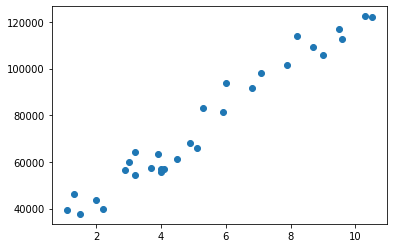

In [9]:
plt.scatter(x, y) # scatter plot to display the values..
plt.show() #data visualization..

In [10]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)


In [11]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den


In [12]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [14]:
B0, B1, reg_line = linear_regression(x, y) #algorithm adding here...
print('Regression Line: ', reg_line)

Regression Line:  y = 25792.20019866869 + 9449.962β


In [15]:
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Correlation Coef.:  0.97824161848876
"Goodness of Fit":  0.9569566641435087


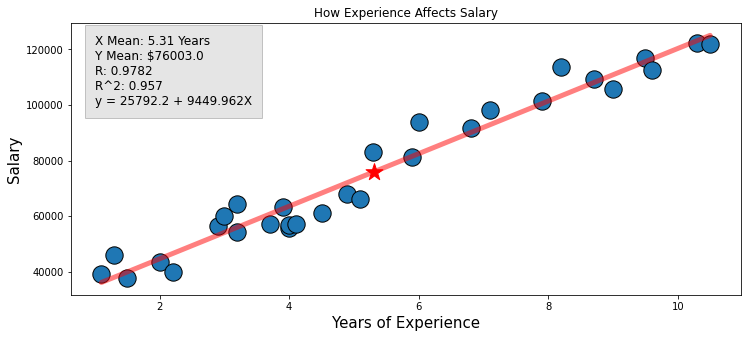

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Experience Affects Salary')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point
